<a href="https://colab.research.google.com/github/MaykolMedrano/Books/blob/master/Calculo_pobreza_Enaho_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Instalamos librerias de interes
!pip install pyreadstat
!pip install weightedcalcs

In [ ]:
#Importamos librerias de interes
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import weightedcalcs as wc

In [ ]:
#Consultamos directorio actual
!pwd

/content


In [ ]:
#Establecemos directorio de trabajo
path = "/content/drive/MyDrive/Colab Notebooks/enaho_2020"
os.chdir(path)
!pwd
print(os.listdir())

/content/drive/MyDrive/Colab Notebooks/enaho_2020
['enaho01-2020-100.dta', 'enaho01-2020-200.dta', 'Sumaria-2020.sav', 'sumaria-2020.dta']


In [ ]:
#Cargamos base de datos
sumaria = pd.read_spss("Sumaria-2020.sav")
sumaria.columns = sumaria.columns.str.lower()
sumaria.head(2)

,año,mes,conglome,vivienda,hogar,ubigeo,dominio,estrato,mieperho,totmieho,percepho,ia01hd,ia02hd,ig03hd1,ig03hd2,ig03hd3,ig03hd4,ga03hd,ga04hd,sg23,sig24,sg25,sig26,sg42,sg421,sg422,sg423,sg42d,sg42d1,sg42d2,sg42d3,ingbruhd,ingnethd,pagesphd,ingindhd,ingauthd,insedthd,insedthd1,insedlhd,paesechd,...,gru73hd1,gru73hd2,gru73hd3,gru74hd,gru81hd,gru82hd1,gru82hd2,gru83hd1,gru83hd2,gru83hd3,gru83hd4,gru84hd,gru84hd1,gru85hd1,gru86hd1,gru86hd2,gru87hd,ingotrhd,ingmo1hd,ingmo2hd,inghog1d,inghog1d1,inghog2d,inghog2d1,gashog1d,gashog21,gashog22,gashog23,gashog24,gashog26,gashog25,gashog2d,ld,estrsocial,linpe,linea,pobreza,factor07,nconglome,sub_conglome
0,2020,01,005009,012,11,010101,sierra norte,"de 20,000 a 49,999 habitantes",2.0,2.0,2.0,4444.0,0.0,0.0,0.0,0.0,0.0,0.0,4444.0,0.0,0.0,0.0,0.0,158.420214,117.956039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20387.0,11057.0,0.0,0.0,0.0,0.0,...,208.0,0.0,0.0,0.0,443.482422,0.000000,0.0,0.0,120.400375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21201.0,21201.0,37274.425781,37274.425781,37274.425781,37274.425781,9875.891602,24789.419922,24789.419922,24789.419922,24789.419922,24789.419922,25065.796875,25065.796875,0.815806,E,172.961548,303.520996,No Pobre,149.202744,007076,00
1,2020,01,005009,041,11,010101,sierra norte,"de 20,000 a 49,999 habitantes",2.0,2.0,2.0,4215.0,0.0,0.0,0.0,0.0,0.0,0.0,4215.0,0.0,0.0,0.0,0.0,133.776596,67.000689,0.0,0.0,0.0,0.0,0.0,0.0,2433.0,2433.0,0.0,15436.0,3686.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1560.267822,224.748917,0.0,0.0,771.585022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22732.0,22732.0,41967.570312,40421.570312,41967.570312,40421.570312,10971.022461,28449.242188,28449.242188,28449.242188,28449.242188,28449.242188,28650.019531,28650.019531,0.815806,E,172.961548,303.520996,No Pobre,149.202744,007076,00


In [ ]:
sumaria.shape

(34490, 174)

In [ ]:
#Generamos variables de interes
# 1) Ingreso per capita mensual
# 2) Gasto per capita mensual
sumaria["ingreso"]  = sumaria["inghog1d"]/(12*sumaria["mieperho"])
sumaria["gasto"]    = sumaria["gashog2d"]/(12*sumaria["mieperho"])
sumaria.head(2)

,año,mes,conglome,vivienda,hogar,ubigeo,dominio,estrato,mieperho,totmieho,percepho,ia01hd,ia02hd,ig03hd1,ig03hd2,ig03hd3,ig03hd4,ga03hd,ga04hd,sg23,sig24,sg25,sig26,sg42,sg421,sg422,sg423,sg42d,sg42d1,sg42d2,sg42d3,ingbruhd,ingnethd,pagesphd,ingindhd,ingauthd,insedthd,insedthd1,insedlhd,paesechd,...,gru73hd3,gru74hd,gru81hd,gru82hd1,gru82hd2,gru83hd1,gru83hd2,gru83hd3,gru83hd4,gru84hd,gru84hd1,gru85hd1,gru86hd1,gru86hd2,gru87hd,ingotrhd,ingmo1hd,ingmo2hd,inghog1d,inghog1d1,inghog2d,inghog2d1,gashog1d,gashog21,gashog22,gashog23,gashog24,gashog26,gashog25,gashog2d,ld,estrsocial,linpe,linea,pobreza,factor07,nconglome,sub_conglome,ingreso,gasto
0,2020,01,005009,012,11,010101,sierra norte,"de 20,000 a 49,999 habitantes",2.0,2.0,2.0,4444.0,0.0,0.0,0.0,0.0,0.0,0.0,4444.0,0.0,0.0,0.0,0.0,158.420214,117.956039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20387.0,11057.0,0.0,0.0,0.0,0.0,...,0.0,0.0,443.482422,0.000000,0.0,0.0,120.400375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21201.0,21201.0,37274.425781,37274.425781,37274.425781,37274.425781,9875.891602,24789.419922,24789.419922,24789.419922,24789.419922,24789.419922,25065.796875,25065.796875,0.815806,E,172.961548,303.520996,No Pobre,149.202744,007076,00,1553.101074,1044.408203
1,2020,01,005009,041,11,010101,sierra norte,"de 20,000 a 49,999 habitantes",2.0,2.0,2.0,4215.0,0.0,0.0,0.0,0.0,0.0,0.0,4215.0,0.0,0.0,0.0,0.0,133.776596,67.000689,0.0,0.0,0.0,0.0,0.0,0.0,2433.0,2433.0,0.0,15436.0,3686.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1560.267822,224.748917,0.0,0.0,771.585022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22732.0,22732.0,41967.570312,40421.570312,41967.570312,40421.570312,10971.022461,28449.242188,28449.242188,28449.242188,28449.242188,28449.242188,28650.019531,28650.019531,0.815806,E,172.961548,303.520996,No Pobre,149.202744,007076,00,1748.648763,1193.750814


In [ ]:
#Generamos tasa de pobreza
#pobre = (gasto<linea)
#Generamos variable "pobre" mediante comparación gasto y linea de pobreza
sumaria["pobre"] = np.where(sumaria["gasto"] < sumaria["linea"], "pobre", "no pobre")
#Generamos variable "pc_pobre" recodificando variable "pobreza"
sumaria["pc_pobre"] = sumaria["pobreza"].replace({"Pobre Extremo": "Pobre", 
                                                  "Pobre No Extremo": "Pobre",
                                                  "No pobre": "No pobre"})
sumaria.head(2)

,año,mes,conglome,vivienda,hogar,ubigeo,dominio,estrato,mieperho,totmieho,percepho,ia01hd,ia02hd,ig03hd1,ig03hd2,ig03hd3,ig03hd4,ga03hd,ga04hd,sg23,sig24,sg25,sig26,sg42,sg421,sg422,sg423,sg42d,sg42d1,sg42d2,sg42d3,ingbruhd,ingnethd,pagesphd,ingindhd,ingauthd,insedthd,insedthd1,insedlhd,paesechd,...,gru81hd,gru82hd1,gru82hd2,gru83hd1,gru83hd2,gru83hd3,gru83hd4,gru84hd,gru84hd1,gru85hd1,gru86hd1,gru86hd2,gru87hd,ingotrhd,ingmo1hd,ingmo2hd,inghog1d,inghog1d1,inghog2d,inghog2d1,gashog1d,gashog21,gashog22,gashog23,gashog24,gashog26,gashog25,gashog2d,ld,estrsocial,linpe,linea,pobreza,factor07,nconglome,sub_conglome,ingreso,gasto,pobre,pc_pobre
0,2020,01,005009,012,11,010101,sierra norte,"de 20,000 a 49,999 habitantes",2.0,2.0,2.0,4444.0,0.0,0.0,0.0,0.0,0.0,0.0,4444.0,0.0,0.0,0.0,0.0,158.420214,117.956039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20387.0,11057.0,0.0,0.0,0.0,0.0,...,443.482422,0.000000,0.0,0.0,120.400375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21201.0,21201.0,37274.425781,37274.425781,37274.425781,37274.425781,9875.891602,24789.419922,24789.419922,24789.419922,24789.419922,24789.419922,25065.796875,25065.796875,0.815806,E,172.961548,303.520996,No Pobre,149.202744,007076,00,1553.101074,1044.408203,no pobre,No Pobre
1,2020,01,005009,041,11,010101,sierra norte,"de 20,000 a 49,999 habitantes",2.0,2.0,2.0,4215.0,0.0,0.0,0.0,0.0,0.0,0.0,4215.0,0.0,0.0,0.0,0.0,133.776596,67.000689,0.0,0.0,0.0,0.0,0.0,0.0,2433.0,2433.0,0.0,15436.0,3686.0,0.0,0.0,0.0,0.0,...,1560.267822,224.748917,0.0,0.0,771.585022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22732.0,22732.0,41967.570312,40421.570312,41967.570312,40421.570312,10971.022461,28449.242188,28449.242188,28449.242188,28449.242188,28449.242188,28650.019531,28650.019531,0.815806,E,172.961548,303.520996,No Pobre,149.202744,007076,00,1748.648763,1193.750814,no pobre,No Pobre


In [ ]:
#Tabla de comparación
print("*-----------------------------------*")
print("Comparación de variables de pobreza")
print("*-----------------------------------*")
print("Pobreza")
print(sumaria["pobreza"].value_counts())
print("*-----------------------------------*")
print("Pobre")
print(sumaria["pobre"].value_counts())
print("*-----------------------------------*")
print("pc_pobre")
print(sumaria["pc_pobre"].value_counts())
print("*-----------------------------------*")

*-----------------------------------*
Comparación de variables de pobreza
*-----------------------------------*
Pobreza
No Pobre            26766
Pobre No Extremo     6272
Pobre Extremo        1452
Name: pobreza, dtype: int64
*-----------------------------------*
Pobre
no pobre    26766
pobre        7724
Name: pobre, dtype: int64
*-----------------------------------*
pc_pobre
No Pobre    26766
Pobre        7724
Name: pc_pobre, dtype: int64
*-----------------------------------*


In [ ]:
#Generamos variable departamento
sumaria["dpto"] = sumaria["ubigeo"].str[0:2]
sumaria["dpto"] = sumaria["dpto"].replace({ "01": "Amazonas","02": "Ancash","03": "Apurimac","04":"Arequipa","05": "Ayacucho",
                                            "06": "Cajamarca","07": "Callao","08": "Cusco","09": "Huancavelica","10":"Huanuco", 
                                            "11": "Ica","12":"Junin", "13": "La Libertad","14": "Lambayeque","15":"Lima",
                                            "16": "Loreto","17":"Madre de Dios","18": "Moquegua","19":"Pasco","20":"Piura",
                                            "21": "Puno","22":"San Martin","23":"Tacna","24":"Tumbes","25":"Ucayali"
                                            })
sumaria.head(2)

,año,mes,conglome,vivienda,hogar,ubigeo,dominio,estrato,mieperho,totmieho,percepho,ia01hd,ia02hd,ig03hd1,ig03hd2,ig03hd3,ig03hd4,ga03hd,ga04hd,sg23,sig24,sg25,sig26,sg42,sg421,sg422,sg423,sg42d,sg42d1,sg42d2,sg42d3,ingbruhd,ingnethd,pagesphd,ingindhd,ingauthd,insedthd,insedthd1,insedlhd,paesechd,...,gru82hd1,gru82hd2,gru83hd1,gru83hd2,gru83hd3,gru83hd4,gru84hd,gru84hd1,gru85hd1,gru86hd1,gru86hd2,gru87hd,ingotrhd,ingmo1hd,ingmo2hd,inghog1d,inghog1d1,inghog2d,inghog2d1,gashog1d,gashog21,gashog22,gashog23,gashog24,gashog26,gashog25,gashog2d,ld,estrsocial,linpe,linea,pobreza,factor07,nconglome,sub_conglome,ingreso,gasto,pobre,pc_pobre,dpto
0,2020,01,005009,012,11,010101,sierra norte,"de 20,000 a 49,999 habitantes",2.0,2.0,2.0,4444.0,0.0,0.0,0.0,0.0,0.0,0.0,4444.0,0.0,0.0,0.0,0.0,158.420214,117.956039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20387.0,11057.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,120.400375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21201.0,21201.0,37274.425781,37274.425781,37274.425781,37274.425781,9875.891602,24789.419922,24789.419922,24789.419922,24789.419922,24789.419922,25065.796875,25065.796875,0.815806,E,172.961548,303.520996,No Pobre,149.202744,007076,00,1553.101074,1044.408203,no pobre,No Pobre,Amazonas
1,2020,01,005009,041,11,010101,sierra norte,"de 20,000 a 49,999 habitantes",2.0,2.0,2.0,4215.0,0.0,0.0,0.0,0.0,0.0,0.0,4215.0,0.0,0.0,0.0,0.0,133.776596,67.000689,0.0,0.0,0.0,0.0,0.0,0.0,2433.0,2433.0,0.0,15436.0,3686.0,0.0,0.0,0.0,0.0,...,224.748917,0.0,0.0,771.585022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22732.0,22732.0,41967.570312,40421.570312,41967.570312,40421.570312,10971.022461,28449.242188,28449.242188,28449.242188,28449.242188,28449.242188,28650.019531,28650.019531,0.815806,E,172.961548,303.520996,No Pobre,149.202744,007076,00,1748.648763,1193.750814,no pobre,No Pobre,Amazonas


In [ ]:
#Generamos variable "area" geografica
sumaria["area"] = sumaria["estrato"].replace({"de 500,000 a más habitantes"       : "Urbana",
                                                "de 100,000 a 499,999 habitantes" : "Urbana",
                                                "de 50,000 a 99,999 habitantes"   : "Urbana",
                                                "de 20,000 a 49,999 habitantes"   : "Urbana",
                                                "de 2,000 a 19,999 habitantes"    : "Urbana",
                                                "de 500 a 1,999 habitantes"       : "Rural",
                                                "Área de empadronamiento rural (aer) simple"    : "Rural",
                                                "Área de empadronamiento rural (aer) compuesto" : "Rural"
                                                })
#sumaria["area"] = np.where(sumaria["estrato"] <= 5, "Urbana", "Rural")
sumaria["area"].value_counts()

Urbana    21863
Rural     12627
Name: area, dtype: int64

In [ ]:
#Generamos variable "región natutal" geografica
sumaria["region_natural"] = sumaria["dominio"].replace({"costa sur" : "Costa",
                                                "costa centro"      : "Costa",
                                                "costa norte"       : "Costa",
                                                "sierra sur"        : "Sierra",
                                                "sierra centro"     : "Sierra",
                                                "sierra norte"      : "Sierra",
                                                "selva"            : "Selva",
                                                "lima metropolitana" : "Costa"
                                                })

In [ ]:
#Tasa de pobreza usando factor expansión / ponderador
sumaria["facpop"] = sumaria["factor07"]*sumaria["mieperho"]
calc = wc.Calculator("facpop")

#Distribución de variable "pc_pobre"
calc.distribution(sumaria, "pc_pobre").round(3).sort_values(ascending=False)

pc_pobre
No Pobre    0.699
Pobre       0.301
Name: facpop, dtype: float64

In [ ]:
pobre = calc.distribution(sumaria, "pc_pobre").round(3).sort_values(ascending=False) 
df = pd.DataFrame(pobre)
df

,facpop
pc_pobre,
No Pobre,0.699
Pobre,0.301


In [ ]:
pd.crosstab(sumaria.dpto, sumaria.pc_pobre, values=sumaria.facpop, normalize='index', aggfunc=sum, margins=True).applymap('{:.2f}'.format)

pc_pobre,No Pobre,Pobre
dpto,,
Amazonas,0.64,0.36
Ancash,0.70,0.30
Apurimac,0.65,0.35
Arequipa,0.81,0.19
Ayacucho,0.54,0.46
Cajamarca,0.57,0.43
Callao,0.65,0.35
Cusco,0.68,0.32
Huancavelica,0.52,0.48


In [ ]:
tab1 = pd.crosstab(sumaria.area, sumaria.pc_pobre, values=sumaria.facpop, normalize='index', aggfunc=sum, margins=True).applymap('{:.2f}'.format)
tab1 = pd.DataFrame(tab1)
tab1.reset_index()
tab1

pc_pobre,No Pobre,Pobre
area,,
Rural,0.54,0.46
Urbana,0.74,0.26
All,0.70,0.30


In [ ]:
pd.crosstab(sumaria.region_natural, sumaria.pc_pobre, values=sumaria.facpop, normalize='index', aggfunc=sum, margins=True).applymap('{:.2f}'.format)

pc_pobre,No Pobre,Pobre
region_natural,,
Costa,0.74,0.26
Selva,0.69,0.31
Sierra,0.63,0.37
All,0.70,0.30


In [ ]:
#Generamos tablas sin ponderador
pd.crosstab(sumaria.estrsocial, sumaria.pc_pobre, values=sumaria.facpop, normalize='index', aggfunc=sum, margins=True)

pc_pobre,No Pobre,Pobre
estrsocial,,
A,0.956583,0.043417
B,0.940576,0.059424
C,0.838970,0.161030
D,0.786448,0.213552
E,0.653719,0.346281
Rural,0.542751,0.457249
All,0.698668,0.301332


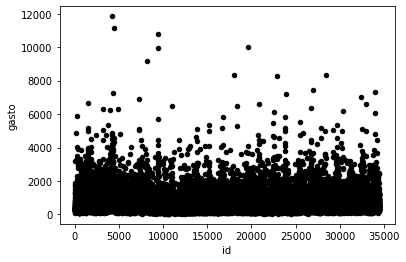

In [ ]:
sumaria["id"] = sumaria.index
sumaria.plot.scatter(x="id",y="gasto",c="black")

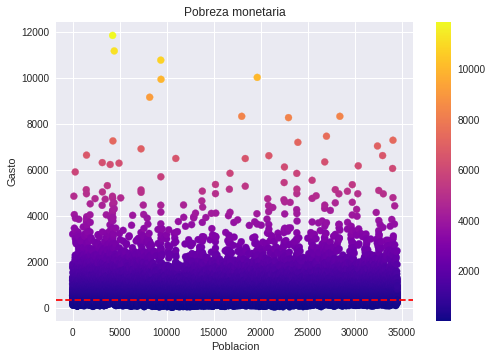

In [ ]:
# adding style theme in scatter plot
plt.style.use('seaborn')
# creating scatter plot with both negative 
# and positive axes
plt.scatter(sumaria.id, sumaria.gasto, c=sumaria.gasto, cmap='plasma')
# adding vertical line in data co-ordinates
#plt.axvline(0, c='white', ls='--')
# adding horizontal line in data co-ordinates
plt.axhline(360, c='red', ls='--')
# giving x label to the plot
plt.xlabel("Poblacion")
# giving y label to the plot
plt.ylabel("Gasto")
# giving title to the plot
plt.title("Pobreza monetaria")
# visualizing the mapping from values to colors
plt.colorbar()
# visualizing the plot using plt.show() function
plt.show()

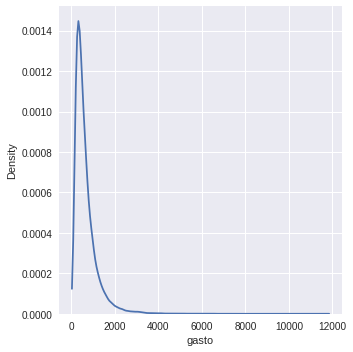

In [ ]:
sns.displot(sumaria, x="gasto", kind="kde", cut=0)